# Supervised Learning: Classification Task, Parameter Search, Cross Validation and Boosting

## 1. Prepare

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv("Pizza_classification/Pizza.csv")
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [163]:
df.brand.value_counts()

H    33
D    32
J    32
B    31
F    30
A    29
G    29
I    29
E    28
C    27
Name: brand, dtype: int64

## 2. Data Preprocessing

### Drop Columns

In [164]:
df = df.drop(['id'], axis='columns')

### Handle Duplicated

In [165]:
df.duplicated().sum()

5

In [166]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


### Feature Engineering

In [167]:
from sklearn.preprocessing import LabelEncoder

In [172]:
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])
df.head()

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67


## 3. Train test split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X = df.drop('brand', axis=1)
y = df['brand'].copy()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=422)

In [176]:
print(X_train.shape)
print(X_test.shape)

(206, 7)
(89, 7)


## 4. Hyperclassifier Search

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [178]:
models = {
    'SVM': SVC(max_iter=10000),
    'kNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [179]:
params = { 
    'SVM': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    },
    'kNN': {
        'n_neighbors': [3, 5, 7, 9, 11], 
        'weights': ['uniform','balanced']
    },
    'DT': {
        'criterion': ['gini', 'Entropy'],
        'class_weight': ['balanced', None]
    },
    'RandomForestClassifier': { 
        'n_estimators': [50, 100, 200, 300, 400, 500],
        'class_weight': ['balanced',None]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.3]
    }
}

In [180]:
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train, y_train, cv=5)

Search for SVM ...
Search for kNN ...
Search for DT ...
Search for RandomForestClassifier ...
Search for XGBoost ...
Search is done.


results round for: SVM
results round for: kNN
results round for: DT
results round for: RandomForestClassifier
results round for: XGBoost


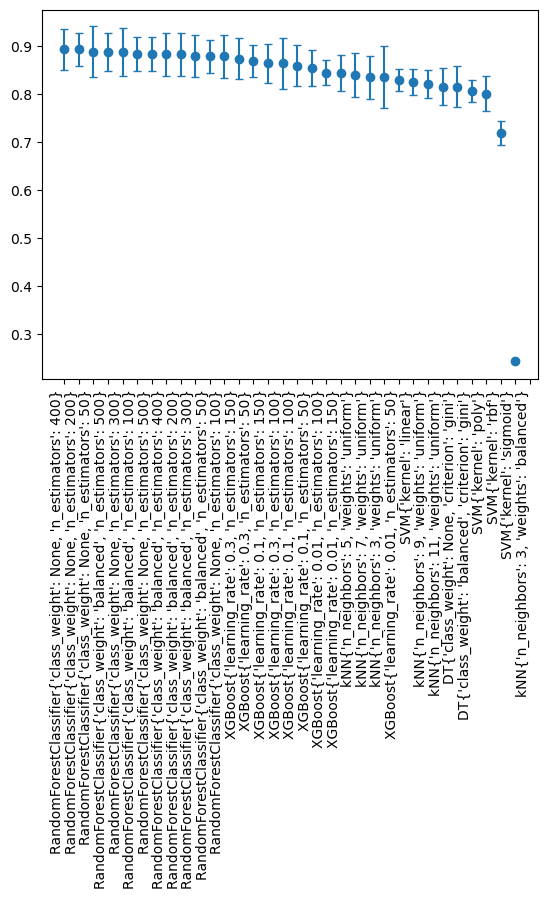

In [181]:
result = search.evaluate_model()
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')
plt.show()

NOTE: Bộ thông số phù hợp cho: 
- SVM: kernel: 'linear'
- kNN: n_neighbors: 5, weights: 'uniform'
- Decision Tree: class_weight: None, criterion: 'gini'
- Random Forest: n_estimators: 400, class_weight: None
- XGBoost: learning_rate: 0.3, n_estimators: 150

**NOTE: Model cho kết quả tốt nhất là Random Forest (n_estimators: 400, class_weight: None)**

## 5. Random Forest Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400)

In [183]:
y_predict = model.predict(X_test)
print(classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000         9
           2     1.0000    0.9000    0.9474        10
           3     0.8571    1.0000    0.9231         6
           4     1.0000    0.5000    0.6667         4
           5     0.6923    1.0000    0.8182         9
           6     1.0000    0.6000    0.7500        10
           7     0.8000    1.0000    0.8889         8
           8     1.0000    1.0000    1.0000         9
           9     1.0000    1.0000    1.0000        12

    accuracy                         0.9213        89
   macro avg     0.9349    0.9000    0.8994        89
weighted avg     0.9413    0.9213    0.9175        89



**NOTE: Độ chính xác của model Random Forest là 92.13%**

## 6. XGBoost Model

In [137]:
from xgboost import XGBClassifier

In [184]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [185]:
y_predict = xgb.predict(X_test)
print(classification_report(y_test,y_predict,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000         9
           2     1.0000    0.8000    0.8889        10
           3     0.7500    1.0000    0.8571         6
           4     0.7500    0.7500    0.7500         4
           5     0.6429    1.0000    0.7826         9
           6     1.0000    0.5000    0.6667        10
           7     0.8750    0.8750    0.8750         8
           8     1.0000    1.0000    1.0000         9
           9     1.0000    1.0000    1.0000        12

    accuracy                         0.8989        89
   macro avg     0.9018    0.8925    0.8820        89
weighted avg     0.9246    0.8989    0.8960        89



**NOTE: Độ chính xác của model XGBoost là 89.89%, kém hơn so với model Random Forest**